In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data = pd.read_csv('flight_delays.csv', na_values = '?')
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


Визуальный анализ данных покахал, что датасет соодерижит как категориальные, так и вещественные переменные. Таким образом, для провеедения классификации небоходимым является привовести encoding данных.

In [3]:
X = data.loc[:, :'Distance'] 
y = data[['dep_delayed_15min']]

In [4]:
y = (y == 'Y').astype(int)
y.value_counts(normalize=True)

dep_delayed_15min
0                    0.80956
1                    0.19044
dtype: float64

Анализ распределния таргета - задерки рейса на 15 минут - показал неравномерность ввыборки, что может сказаться на работе алгоритмов классификации. 

In [6]:
for i in ['Month', 'DayofMonth', 'DayOfWeek']:
    X[i] = data[i].apply(lambda st: int(st.lstrip('c-')))
X.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,8,21,7,1934,AA,ATL,DFW,732
1,4,20,3,1548,US,PIT,MCO,834
2,9,2,5,1422,XE,RDU,CLE,416
3,11,25,6,1015,OO,DEN,MEM,872
4,10,7,6,1828,WN,MDW,OMA,423


In [7]:
model = CatBoostClassifier()
cat_features_idx = np.where(X.dtypes == 'object')[0].tolist()

Таким образом, переменные месяца, дня в месяце и дня недели были приведены к вещественному типу данных. В качестве алгоритма классификации был выбрал алгоритм CatBoost.

  0%|          | 0/39 [00:00<?, ?it/s]

Learning rate set to 0.5
0:	learn: 0.5346064	total: 86.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 16.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 15ms	remaining: 0us


  3%|▎         | 1/39 [00:00<00:33,  1.14it/s]

Learning rate set to 0.5
0:	learn: 0.5339609	total: 15.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346941	total: 14.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 32.9ms	remaining: 32.9ms
1:	learn: 0.4819445	total: 57.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 26.4ms	remaining: 26.4ms
1:	learn: 0.4819608	total: 45.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 14ms	remaining: 14ms
1:	learn: 0.4816359	total: 29.3ms	remaining: 0us


  5%|▌         | 2/39 [00:01<00:30,  1.20it/s]

Learning rate set to 0.5
0:	learn: 0.5339609	total: 15.8ms	remaining: 15.8ms
1:	learn: 0.4809642	total: 29.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346941	total: 13.4ms	remaining: 13.4ms
1:	learn: 0.4814641	total: 27.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 14.3ms	remaining: 28.6ms
1:	learn: 0.4819445	total: 28.8ms	remaining: 14.4ms
2:	learn: 0.4611575	total: 42ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 17.7ms	remaining: 35.3ms
1:	learn: 0.4819608	total: 36.4ms	remaining: 18.2ms
2:	learn: 0.4618426	total: 66.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 13.7ms	remaining: 27.4ms
1:	learn: 0.4816359	total: 28ms	remaining: 14ms
2:	learn: 0.4609604	total: 41.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339609	total: 13.4ms	remaining: 26.8ms
1:	learn: 0.4809642	total: 27.1ms	remaining: 13.6ms
2:	learn: 0.4614429	total: 40.8ms	remaining: 0us


  8%|▊         | 3/39 [00:02<00:30,  1.18it/s]

Learning rate set to 0.5
0:	learn: 0.5346941	total: 14ms	remaining: 27.9ms
1:	learn: 0.4814641	total: 28ms	remaining: 14ms
2:	learn: 0.4611677	total: 40.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 16.3ms	remaining: 49ms
1:	learn: 0.4819445	total: 35.6ms	remaining: 35.6ms
2:	learn: 0.4611575	total: 57.1ms	remaining: 19ms
3:	learn: 0.4527808	total: 75.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 14.2ms	remaining: 42.7ms
1:	learn: 0.4819608	total: 33.3ms	remaining: 33.3ms
2:	learn: 0.4618426	total: 57.8ms	remaining: 19.3ms
3:	learn: 0.4517144	total: 76ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 40.7ms	remaining: 122ms
1:	learn: 0.4816359	total: 76ms	remaining: 76ms
2:	learn: 0.4609604	total: 108ms	remaining: 35.9ms
3:	learn: 0.4514511	total: 143ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339609	total: 41.9ms	remaining: 126ms
1:	learn: 0.4809642	total: 70.2ms	remaining: 70.2ms
2:	learn: 0.4614429	tot

 10%|█         | 4/39 [00:04<00:41,  1.19s/it]

Learning rate set to 0.5
0:	learn: 0.5346064	total: 66.1ms	remaining: 264ms
1:	learn: 0.4819445	total: 123ms	remaining: 184ms
2:	learn: 0.4611575	total: 191ms	remaining: 127ms
3:	learn: 0.4527808	total: 274ms	remaining: 68.4ms
4:	learn: 0.4477021	total: 318ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 47ms	remaining: 188ms
1:	learn: 0.4819608	total: 87.4ms	remaining: 131ms
2:	learn: 0.4618426	total: 122ms	remaining: 81.4ms
3:	learn: 0.4517144	total: 160ms	remaining: 40.1ms
4:	learn: 0.4467913	total: 193ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 25.4ms	remaining: 101ms
1:	learn: 0.4816359	total: 61.8ms	remaining: 92.6ms
2:	learn: 0.4609604	total: 82.4ms	remaining: 55ms
3:	learn: 0.4514511	total: 109ms	remaining: 27.1ms
4:	learn: 0.4464192	total: 128ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339609	total: 33.3ms	remaining: 133ms
1:	learn: 0.4809642	total: 64.7ms	remaining: 97ms
2:	learn: 0.4614429	total: 82ms	remaining: 54.7

 13%|█▎        | 5/39 [00:06<00:50,  1.48s/it]

Learning rate set to 0.5
0:	learn: 0.5346941	total: 19.4ms	remaining: 77.7ms
1:	learn: 0.4814641	total: 39.5ms	remaining: 59.3ms
2:	learn: 0.4611677	total: 58.9ms	remaining: 39.3ms
3:	learn: 0.4514378	total: 81.8ms	remaining: 20.4ms
4:	learn: 0.4465784	total: 101ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 19.6ms	remaining: 98.1ms
1:	learn: 0.4819445	total: 40.8ms	remaining: 81.5ms
2:	learn: 0.4611575	total: 59.3ms	remaining: 59.3ms
3:	learn: 0.4527808	total: 80.7ms	remaining: 40.3ms
4:	learn: 0.4477021	total: 100ms	remaining: 20ms
5:	learn: 0.4458622	total: 116ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 25.9ms	remaining: 130ms
1:	learn: 0.4819608	total: 48.4ms	remaining: 96.8ms
2:	learn: 0.4618426	total: 68.3ms	remaining: 68.3ms
3:	learn: 0.4517144	total: 92ms	remaining: 46ms
4:	learn: 0.4467913	total: 111ms	remaining: 22.1ms
5:	learn: 0.4441907	total: 131ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 22.2ms	rem

 15%|█▌        | 6/39 [00:07<00:48,  1.47s/it]

Learning rate set to 0.5
0:	learn: 0.5346064	total: 35.6ms	remaining: 214ms
1:	learn: 0.4819445	total: 66.1ms	remaining: 165ms
2:	learn: 0.4611575	total: 89.4ms	remaining: 119ms
3:	learn: 0.4527808	total: 121ms	remaining: 90.9ms
4:	learn: 0.4477021	total: 161ms	remaining: 64.5ms
5:	learn: 0.4458622	total: 186ms	remaining: 31ms
6:	learn: 0.4438620	total: 220ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 46ms	remaining: 276ms
1:	learn: 0.4819608	total: 75.5ms	remaining: 189ms
2:	learn: 0.4618426	total: 111ms	remaining: 148ms
3:	learn: 0.4517144	total: 144ms	remaining: 108ms
4:	learn: 0.4467913	total: 171ms	remaining: 68.5ms
5:	learn: 0.4441907	total: 193ms	remaining: 32.1ms
6:	learn: 0.4423153	total: 222ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 32ms	remaining: 192ms
1:	learn: 0.4816359	total: 62.3ms	remaining: 156ms
2:	learn: 0.4609604	total: 97.2ms	remaining: 130ms
3:	learn: 0.4514511	total: 131ms	remaining: 98.1ms
4:	learn: 0.4464192	t

 18%|█▊        | 7/39 [00:09<00:52,  1.64s/it]

6:	learn: 0.4423172	total: 214ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 19.5ms	remaining: 136ms
1:	learn: 0.4819445	total: 47.9ms	remaining: 144ms
2:	learn: 0.4611575	total: 73.1ms	remaining: 122ms
3:	learn: 0.4527808	total: 97ms	remaining: 97ms
4:	learn: 0.4477021	total: 115ms	remaining: 69.1ms
5:	learn: 0.4458622	total: 131ms	remaining: 43.5ms
6:	learn: 0.4438620	total: 149ms	remaining: 21.3ms
7:	learn: 0.4419914	total: 170ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 20.5ms	remaining: 144ms
1:	learn: 0.4819608	total: 40.7ms	remaining: 122ms
2:	learn: 0.4618426	total: 59.1ms	remaining: 98.4ms
3:	learn: 0.4517144	total: 79.6ms	remaining: 79.6ms
4:	learn: 0.4467913	total: 97.8ms	remaining: 58.7ms
5:	learn: 0.4441907	total: 115ms	remaining: 38.3ms
6:	learn: 0.4423153	total: 136ms	remaining: 19.4ms
7:	learn: 0.4406987	total: 157ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5356351	total: 22.4ms	remaining: 157ms
1:	learn: 0.4816

 21%|██        | 8/39 [00:11<00:50,  1.62s/it]

Learning rate set to 0.5
0:	learn: 0.5346941	total: 23.2ms	remaining: 163ms
1:	learn: 0.4814641	total: 44.6ms	remaining: 134ms
2:	learn: 0.4611677	total: 62.8ms	remaining: 105ms
3:	learn: 0.4514378	total: 85.2ms	remaining: 85.2ms
4:	learn: 0.4465784	total: 102ms	remaining: 61.1ms
5:	learn: 0.4437814	total: 119ms	remaining: 39.5ms
6:	learn: 0.4423172	total: 138ms	remaining: 19.7ms
7:	learn: 0.4409723	total: 155ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 22.4ms	remaining: 179ms
1:	learn: 0.4819445	total: 41ms	remaining: 144ms
2:	learn: 0.4611575	total: 57.6ms	remaining: 115ms
3:	learn: 0.4527808	total: 76.9ms	remaining: 96.2ms
4:	learn: 0.4477021	total: 93.7ms	remaining: 75ms
5:	learn: 0.4458622	total: 107ms	remaining: 53.6ms
6:	learn: 0.4438620	total: 124ms	remaining: 35.4ms
7:	learn: 0.4419914	total: 141ms	remaining: 17.7ms
8:	learn: 0.4403927	total: 157ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 19.6ms	remaining: 157ms
1:	learn: 0.48

 23%|██▎       | 9/39 [00:12<00:48,  1.61s/it]

Learning rate set to 0.5
0:	learn: 0.5346064	total: 15.8ms	remaining: 142ms
1:	learn: 0.4819445	total: 31.1ms	remaining: 124ms
2:	learn: 0.4611575	total: 45.7ms	remaining: 107ms
3:	learn: 0.4527808	total: 62.2ms	remaining: 93.3ms
4:	learn: 0.4477021	total: 76.3ms	remaining: 76.3ms
5:	learn: 0.4458622	total: 88.3ms	remaining: 58.8ms
6:	learn: 0.4438620	total: 105ms	remaining: 44.9ms
7:	learn: 0.4419914	total: 122ms	remaining: 30.6ms
8:	learn: 0.4403927	total: 140ms	remaining: 15.6ms
9:	learn: 0.4387333	total: 156ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 16.4ms	remaining: 147ms
1:	learn: 0.4819608	total: 32.3ms	remaining: 129ms
2:	learn: 0.4618426	total: 47.8ms	remaining: 112ms
3:	learn: 0.4517144	total: 64.1ms	remaining: 96.2ms
4:	learn: 0.4467913	total: 82.1ms	remaining: 82.1ms
5:	learn: 0.4441907	total: 96.7ms	remaining: 64.5ms
6:	learn: 0.4423153	total: 113ms	remaining: 48.6ms
7:	learn: 0.4406987	total: 134ms	remaining: 33.5ms
8:	learn: 0.4389935	total: 15

 26%|██▌       | 10/39 [00:14<00:45,  1.58s/it]

Learning rate set to 0.5
0:	learn: 0.5346941	total: 15.7ms	remaining: 141ms
1:	learn: 0.4814641	total: 31.4ms	remaining: 126ms
2:	learn: 0.4611677	total: 46.2ms	remaining: 108ms
3:	learn: 0.4514378	total: 64.2ms	remaining: 96.3ms
4:	learn: 0.4465784	total: 79.3ms	remaining: 79.3ms
5:	learn: 0.4437814	total: 95.3ms	remaining: 63.5ms
6:	learn: 0.4423172	total: 114ms	remaining: 48.8ms
7:	learn: 0.4409723	total: 130ms	remaining: 32.6ms
8:	learn: 0.4392979	total: 145ms	remaining: 16.2ms
9:	learn: 0.4380238	total: 163ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 15.8ms	remaining: 158ms
1:	learn: 0.4819445	total: 31.7ms	remaining: 143ms
2:	learn: 0.4611575	total: 46ms	remaining: 123ms
3:	learn: 0.4527808	total: 62.7ms	remaining: 110ms
4:	learn: 0.4477021	total: 76.6ms	remaining: 91.9ms
5:	learn: 0.4458622	total: 88.5ms	remaining: 73.7ms
6:	learn: 0.4438620	total: 103ms	remaining: 59.1ms
7:	learn: 0.4419914	total: 119ms	remaining: 44.6ms
8:	learn: 0.4403927	total: 137ms

 28%|██▊       | 11/39 [00:15<00:44,  1.59s/it]

8:	learn: 0.4392979	total: 205ms	remaining: 45.5ms
9:	learn: 0.4380238	total: 219ms	remaining: 21.9ms
10:	learn: 0.4364762	total: 232ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.7ms	remaining: 151ms
1:	learn: 0.4819445	total: 28.8ms	remaining: 144ms
2:	learn: 0.4611575	total: 41.5ms	remaining: 124ms
3:	learn: 0.4527808	total: 68.7ms	remaining: 137ms
4:	learn: 0.4477021	total: 82.4ms	remaining: 115ms
5:	learn: 0.4458622	total: 93.3ms	remaining: 93.3ms
6:	learn: 0.4438620	total: 106ms	remaining: 75.9ms
7:	learn: 0.4419914	total: 119ms	remaining: 59.5ms
8:	learn: 0.4403927	total: 131ms	remaining: 43.7ms
9:	learn: 0.4387333	total: 143ms	remaining: 28.5ms
10:	learn: 0.4373070	total: 155ms	remaining: 14.1ms
11:	learn: 0.4365514	total: 168ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 13.6ms	remaining: 150ms
1:	learn: 0.4819608	total: 28ms	remaining: 140ms
2:	learn: 0.4618426	total: 40.9ms	remaining: 123ms
3:	learn: 0.4517144	total: 55.8ms	re

 31%|███       | 12/39 [00:17<00:41,  1.54s/it]

Learning rate set to 0.5
0:	learn: 0.5346941	total: 13ms	remaining: 143ms
1:	learn: 0.4814641	total: 27.2ms	remaining: 136ms
2:	learn: 0.4611677	total: 40.1ms	remaining: 120ms
3:	learn: 0.4514378	total: 55ms	remaining: 110ms
4:	learn: 0.4465784	total: 67.5ms	remaining: 94.5ms
5:	learn: 0.4437814	total: 80ms	remaining: 80ms
6:	learn: 0.4423172	total: 92.7ms	remaining: 66.2ms
7:	learn: 0.4409723	total: 105ms	remaining: 52.5ms
8:	learn: 0.4392979	total: 119ms	remaining: 39.5ms
9:	learn: 0.4380238	total: 132ms	remaining: 26.4ms
10:	learn: 0.4364762	total: 145ms	remaining: 13.1ms
11:	learn: 0.4355052	total: 156ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.9ms	remaining: 167ms
1:	learn: 0.4819445	total: 27.7ms	remaining: 152ms
2:	learn: 0.4611575	total: 39.9ms	remaining: 133ms
3:	learn: 0.4527808	total: 54.1ms	remaining: 122ms
4:	learn: 0.4477021	total: 65.9ms	remaining: 105ms
5:	learn: 0.4458622	total: 76ms	remaining: 88.7ms
6:	learn: 0.4438620	total: 89ms	remaini

 33%|███▎      | 13/39 [00:18<00:39,  1.53s/it]

12:	learn: 0.4349931	total: 199ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.2ms	remaining: 172ms
1:	learn: 0.4819445	total: 27.8ms	remaining: 167ms
2:	learn: 0.4611575	total: 41.3ms	remaining: 152ms
3:	learn: 0.4527808	total: 63.9ms	remaining: 160ms
4:	learn: 0.4477021	total: 80.7ms	remaining: 145ms
5:	learn: 0.4458622	total: 92.4ms	remaining: 123ms
6:	learn: 0.4438620	total: 109ms	remaining: 109ms
7:	learn: 0.4419914	total: 126ms	remaining: 94.8ms
8:	learn: 0.4403927	total: 142ms	remaining: 78.8ms
9:	learn: 0.4387333	total: 160ms	remaining: 64.2ms
10:	learn: 0.4373070	total: 175ms	remaining: 47.8ms
11:	learn: 0.4365514	total: 190ms	remaining: 31.6ms
12:	learn: 0.4356791	total: 205ms	remaining: 15.7ms
13:	learn: 0.4349034	total: 219ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 19.8ms	remaining: 257ms
1:	learn: 0.4819608	total: 37.1ms	remaining: 223ms
2:	learn: 0.4618426	total: 50.9ms	remaining: 186ms
3:	learn: 0.4517144	total: 65.9ms	

 36%|███▌      | 14/39 [00:20<00:41,  1.65s/it]

13:	learn: 0.4345407	total: 252ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.4ms	remaining: 244ms
1:	learn: 0.4819445	total: 34ms	remaining: 221ms
2:	learn: 0.4611575	total: 54.5ms	remaining: 218ms
3:	learn: 0.4527808	total: 75.5ms	remaining: 208ms
4:	learn: 0.4477021	total: 90.7ms	remaining: 181ms
5:	learn: 0.4458622	total: 104ms	remaining: 156ms
6:	learn: 0.4438620	total: 121ms	remaining: 139ms
7:	learn: 0.4419914	total: 139ms	remaining: 121ms
8:	learn: 0.4403927	total: 155ms	remaining: 104ms
9:	learn: 0.4387333	total: 171ms	remaining: 85.7ms
10:	learn: 0.4373070	total: 187ms	remaining: 68.1ms
11:	learn: 0.4365514	total: 202ms	remaining: 50.4ms
12:	learn: 0.4356791	total: 217ms	remaining: 33.3ms
13:	learn: 0.4349034	total: 232ms	remaining: 16.6ms
14:	learn: 0.4340640	total: 247ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 19.9ms	remaining: 279ms
1:	learn: 0.4819608	total: 38.9ms	remaining: 253ms
2:	learn: 0.4618426	total: 55.9ms	rema

 38%|███▊      | 15/39 [00:22<00:43,  1.80s/it]

13:	learn: 0.4345407	total: 212ms	remaining: 15.2ms
14:	learn: 0.4338766	total: 230ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 16.8ms	remaining: 252ms
1:	learn: 0.4819445	total: 34.8ms	remaining: 243ms
2:	learn: 0.4611575	total: 53.9ms	remaining: 233ms
3:	learn: 0.4527808	total: 73.7ms	remaining: 221ms
4:	learn: 0.4477021	total: 89.9ms	remaining: 198ms
5:	learn: 0.4458622	total: 103ms	remaining: 172ms
6:	learn: 0.4438620	total: 119ms	remaining: 153ms
7:	learn: 0.4419914	total: 133ms	remaining: 133ms
8:	learn: 0.4403927	total: 148ms	remaining: 115ms
9:	learn: 0.4387333	total: 164ms	remaining: 98.2ms
10:	learn: 0.4373070	total: 179ms	remaining: 81.5ms
11:	learn: 0.4365514	total: 195ms	remaining: 64.9ms
12:	learn: 0.4356791	total: 214ms	remaining: 49.5ms
13:	learn: 0.4349034	total: 230ms	remaining: 32.9ms
14:	learn: 0.4340640	total: 249ms	remaining: 16.6ms
15:	learn: 0.4334370	total: 277ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5339771	total: 18.9ms	

 41%|████      | 16/39 [00:25<00:44,  1.93s/it]

10:	learn: 0.4364762	total: 193ms	remaining: 87.7ms
11:	learn: 0.4355052	total: 217ms	remaining: 72.3ms
12:	learn: 0.4349931	total: 233ms	remaining: 53.8ms
13:	learn: 0.4345407	total: 249ms	remaining: 35.6ms
14:	learn: 0.4338766	total: 265ms	remaining: 17.7ms
15:	learn: 0.4335257	total: 282ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 18.9ms	remaining: 302ms
1:	learn: 0.4819445	total: 38.3ms	remaining: 287ms
2:	learn: 0.4611575	total: 53.7ms	remaining: 251ms
3:	learn: 0.4527808	total: 71.9ms	remaining: 234ms
4:	learn: 0.4477021	total: 88ms	remaining: 211ms
5:	learn: 0.4458622	total: 102ms	remaining: 186ms
6:	learn: 0.4438620	total: 118ms	remaining: 169ms
7:	learn: 0.4419914	total: 136ms	remaining: 153ms
8:	learn: 0.4403927	total: 154ms	remaining: 137ms
9:	learn: 0.4387333	total: 171ms	remaining: 119ms
10:	learn: 0.4373070	total: 186ms	remaining: 102ms
11:	learn: 0.4365514	total: 206ms	remaining: 85.8ms
12:	learn: 0.4356791	total: 222ms	remaining: 68.3ms
13:	lear

 44%|████▎     | 17/39 [00:27<00:43,  1.99s/it]

13:	learn: 0.4345407	total: 234ms	remaining: 50.1ms
14:	learn: 0.4338766	total: 254ms	remaining: 33.9ms
15:	learn: 0.4335257	total: 271ms	remaining: 17ms
16:	learn: 0.4328529	total: 288ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 19.6ms	remaining: 333ms
1:	learn: 0.4819445	total: 37.6ms	remaining: 301ms
2:	learn: 0.4611575	total: 54.2ms	remaining: 271ms
3:	learn: 0.4527808	total: 72.5ms	remaining: 254ms
4:	learn: 0.4477021	total: 87.1ms	remaining: 226ms
5:	learn: 0.4458622	total: 104ms	remaining: 207ms
6:	learn: 0.4438620	total: 117ms	remaining: 184ms
7:	learn: 0.4419914	total: 133ms	remaining: 166ms
8:	learn: 0.4403927	total: 148ms	remaining: 148ms
9:	learn: 0.4387333	total: 165ms	remaining: 132ms
10:	learn: 0.4373070	total: 181ms	remaining: 115ms
11:	learn: 0.4365514	total: 199ms	remaining: 99.3ms
12:	learn: 0.4356791	total: 222ms	remaining: 85.3ms
13:	learn: 0.4349034	total: 240ms	remaining: 68.6ms
14:	learn: 0.4340640	total: 258ms	remaining: 51.6ms
15:	lear

 46%|████▌     | 18/39 [00:29<00:43,  2.07s/it]

12:	learn: 0.4349931	total: 203ms	remaining: 78.2ms
13:	learn: 0.4345407	total: 225ms	remaining: 64.2ms
14:	learn: 0.4338766	total: 240ms	remaining: 47.9ms
15:	learn: 0.4335257	total: 253ms	remaining: 31.6ms
16:	learn: 0.4328529	total: 267ms	remaining: 15.7ms
17:	learn: 0.4316252	total: 285ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.4ms	remaining: 313ms
1:	learn: 0.4819445	total: 34.1ms	remaining: 290ms
2:	learn: 0.4611575	total: 49.1ms	remaining: 262ms
3:	learn: 0.4527808	total: 66.2ms	remaining: 248ms
4:	learn: 0.4477021	total: 81.8ms	remaining: 229ms
5:	learn: 0.4458622	total: 94.9ms	remaining: 206ms
6:	learn: 0.4438620	total: 112ms	remaining: 192ms
7:	learn: 0.4419914	total: 129ms	remaining: 177ms
8:	learn: 0.4403927	total: 146ms	remaining: 162ms
9:	learn: 0.4387333	total: 160ms	remaining: 144ms
10:	learn: 0.4373070	total: 175ms	remaining: 128ms
11:	learn: 0.4365514	total: 191ms	remaining: 112ms
12:	learn: 0.4356791	total: 213ms	remaining: 98.2ms
13:	le

 49%|████▊     | 19/39 [00:31<00:41,  2.10s/it]

14:	learn: 0.4338766	total: 203ms	remaining: 54.2ms
15:	learn: 0.4335257	total: 221ms	remaining: 41.5ms
16:	learn: 0.4328529	total: 238ms	remaining: 28.1ms
17:	learn: 0.4316252	total: 254ms	remaining: 14.1ms
18:	learn: 0.4309068	total: 269ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.7ms	remaining: 337ms
1:	learn: 0.4819445	total: 35.1ms	remaining: 316ms
2:	learn: 0.4611575	total: 50.4ms	remaining: 285ms
3:	learn: 0.4527808	total: 67.4ms	remaining: 270ms
4:	learn: 0.4477021	total: 81.2ms	remaining: 244ms
5:	learn: 0.4458622	total: 92.2ms	remaining: 215ms
6:	learn: 0.4438620	total: 106ms	remaining: 196ms
7:	learn: 0.4419914	total: 119ms	remaining: 179ms
8:	learn: 0.4403927	total: 132ms	remaining: 161ms
9:	learn: 0.4387333	total: 144ms	remaining: 144ms
10:	learn: 0.4373070	total: 156ms	remaining: 128ms
11:	learn: 0.4365514	total: 169ms	remaining: 113ms
12:	learn: 0.4356791	total: 182ms	remaining: 98.1ms
13:	learn: 0.4349034	total: 196ms	remaining: 84.2ms
14:	le

 51%|█████▏    | 20/39 [00:33<00:40,  2.11s/it]

16:	learn: 0.4328529	total: 239ms	remaining: 42.2ms
17:	learn: 0.4316252	total: 254ms	remaining: 28.3ms
18:	learn: 0.4309068	total: 267ms	remaining: 14.1ms
19:	learn: 0.4305437	total: 280ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.3ms	remaining: 267ms
1:	learn: 0.4819445	total: 31.3ms	remaining: 297ms
2:	learn: 0.4611575	total: 44ms	remaining: 264ms
3:	learn: 0.4527808	total: 59.4ms	remaining: 253ms
4:	learn: 0.4477021	total: 71.2ms	remaining: 228ms
5:	learn: 0.4458622	total: 81.2ms	remaining: 203ms
6:	learn: 0.4438620	total: 94.3ms	remaining: 189ms
7:	learn: 0.4419914	total: 107ms	remaining: 174ms
8:	learn: 0.4403927	total: 119ms	remaining: 159ms
9:	learn: 0.4387333	total: 131ms	remaining: 144ms
10:	learn: 0.4373070	total: 143ms	remaining: 130ms
11:	learn: 0.4365514	total: 155ms	remaining: 116ms
12:	learn: 0.4356791	total: 167ms	remaining: 103ms
13:	learn: 0.4349034	total: 179ms	remaining: 89.4ms
14:	learn: 0.4340640	total: 191ms	remaining: 76.3ms
15:	lear

 54%|█████▍    | 21/39 [00:35<00:37,  2.08s/it]

17:	learn: 0.4316252	total: 236ms	remaining: 39.4ms
18:	learn: 0.4309068	total: 255ms	remaining: 26.8ms
19:	learn: 0.4305437	total: 268ms	remaining: 13.4ms
20:	learn: 0.4302469	total: 276ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.5ms	remaining: 283ms
1:	learn: 0.4819445	total: 26.7ms	remaining: 267ms
2:	learn: 0.4611575	total: 43.4ms	remaining: 275ms
3:	learn: 0.4527808	total: 59.1ms	remaining: 266ms
4:	learn: 0.4477021	total: 71.8ms	remaining: 244ms
5:	learn: 0.4458622	total: 82.4ms	remaining: 220ms
6:	learn: 0.4438620	total: 96.1ms	remaining: 206ms
7:	learn: 0.4419914	total: 109ms	remaining: 191ms
8:	learn: 0.4403927	total: 121ms	remaining: 175ms
9:	learn: 0.4387333	total: 134ms	remaining: 161ms
10:	learn: 0.4373070	total: 146ms	remaining: 146ms
11:	learn: 0.4365514	total: 159ms	remaining: 132ms
12:	learn: 0.4356791	total: 171ms	remaining: 118ms
13:	learn: 0.4349034	total: 183ms	remaining: 104ms
14:	learn: 0.4340640	total: 195ms	remaining: 90.9ms
15:	lea

 56%|█████▋    | 22/39 [00:38<00:36,  2.16s/it]

15:	learn: 0.4335257	total: 280ms	remaining: 105ms
16:	learn: 0.4328529	total: 297ms	remaining: 87.3ms
17:	learn: 0.4316252	total: 312ms	remaining: 69.2ms
18:	learn: 0.4309068	total: 326ms	remaining: 51.5ms
19:	learn: 0.4305437	total: 342ms	remaining: 34.2ms
20:	learn: 0.4302469	total: 353ms	remaining: 16.8ms
21:	learn: 0.4298605	total: 368ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 25.5ms	remaining: 562ms
1:	learn: 0.4819445	total: 50.2ms	remaining: 527ms
2:	learn: 0.4611575	total: 72.4ms	remaining: 483ms
3:	learn: 0.4527808	total: 104ms	remaining: 492ms
4:	learn: 0.4477021	total: 129ms	remaining: 464ms
5:	learn: 0.4458622	total: 150ms	remaining: 426ms
6:	learn: 0.4438620	total: 174ms	remaining: 398ms
7:	learn: 0.4419914	total: 194ms	remaining: 364ms
8:	learn: 0.4403927	total: 216ms	remaining: 336ms
9:	learn: 0.4387333	total: 243ms	remaining: 316ms
10:	learn: 0.4373070	total: 267ms	remaining: 291ms
11:	learn: 0.4365514	total: 285ms	remaining: 261ms
12:	learn:

 59%|█████▉    | 23/39 [00:41<00:39,  2.47s/it]

Learning rate set to 0.5
0:	learn: 0.5346064	total: 18.1ms	remaining: 417ms
1:	learn: 0.4819445	total: 35.5ms	remaining: 390ms
2:	learn: 0.4611575	total: 54.1ms	remaining: 379ms
3:	learn: 0.4527808	total: 76.8ms	remaining: 384ms
4:	learn: 0.4477021	total: 95.1ms	remaining: 361ms
5:	learn: 0.4458622	total: 110ms	remaining: 329ms
6:	learn: 0.4438620	total: 127ms	remaining: 309ms
7:	learn: 0.4419914	total: 145ms	remaining: 290ms
8:	learn: 0.4403927	total: 168ms	remaining: 280ms
9:	learn: 0.4387333	total: 182ms	remaining: 255ms
10:	learn: 0.4373070	total: 196ms	remaining: 232ms
11:	learn: 0.4365514	total: 216ms	remaining: 216ms
12:	learn: 0.4356791	total: 231ms	remaining: 195ms
13:	learn: 0.4349034	total: 247ms	remaining: 176ms
14:	learn: 0.4340640	total: 262ms	remaining: 157ms
15:	learn: 0.4334370	total: 276ms	remaining: 138ms
16:	learn: 0.4324810	total: 290ms	remaining: 119ms
17:	learn: 0.4319231	total: 305ms	remaining: 102ms
18:	learn: 0.4311659	total: 318ms	remaining: 83.8ms
19:	learn:

 62%|██████▏   | 24/39 [00:43<00:36,  2.44s/it]

14:	learn: 0.4338766	total: 241ms	remaining: 145ms
15:	learn: 0.4335257	total: 273ms	remaining: 137ms
16:	learn: 0.4328529	total: 288ms	remaining: 119ms
17:	learn: 0.4316252	total: 302ms	remaining: 101ms
18:	learn: 0.4309068	total: 320ms	remaining: 84.1ms
19:	learn: 0.4305437	total: 333ms	remaining: 66.6ms
20:	learn: 0.4302469	total: 342ms	remaining: 48.8ms
21:	learn: 0.4298605	total: 353ms	remaining: 32.1ms
22:	learn: 0.4292665	total: 365ms	remaining: 15.9ms
23:	learn: 0.4289786	total: 377ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.4ms	remaining: 323ms
1:	learn: 0.4819445	total: 27.7ms	remaining: 319ms
2:	learn: 0.4611575	total: 40.2ms	remaining: 295ms
3:	learn: 0.4527808	total: 55.1ms	remaining: 289ms
4:	learn: 0.4477021	total: 66.9ms	remaining: 268ms
5:	learn: 0.4458622	total: 77ms	remaining: 244ms
6:	learn: 0.4438620	total: 89.6ms	remaining: 230ms
7:	learn: 0.4419914	total: 103ms	remaining: 219ms
8:	learn: 0.4403927	total: 115ms	remaining: 205ms
9:	lear

 64%|██████▍   | 25/39 [00:46<00:34,  2.50s/it]

15:	learn: 0.4335257	total: 251ms	remaining: 141ms
16:	learn: 0.4328529	total: 273ms	remaining: 128ms
17:	learn: 0.4316252	total: 289ms	remaining: 113ms
18:	learn: 0.4309068	total: 305ms	remaining: 96.2ms
19:	learn: 0.4305437	total: 319ms	remaining: 79.9ms
20:	learn: 0.4302469	total: 332ms	remaining: 63.2ms
21:	learn: 0.4298605	total: 346ms	remaining: 47.2ms
22:	learn: 0.4292665	total: 359ms	remaining: 31.2ms
23:	learn: 0.4289786	total: 372ms	remaining: 15.5ms
24:	learn: 0.4285133	total: 386ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 16.8ms	remaining: 419ms
1:	learn: 0.4819445	total: 33.5ms	remaining: 402ms
2:	learn: 0.4611575	total: 48.1ms	remaining: 369ms
3:	learn: 0.4527808	total: 65.8ms	remaining: 362ms
4:	learn: 0.4477021	total: 80.8ms	remaining: 340ms
5:	learn: 0.4458622	total: 93ms	remaining: 310ms
6:	learn: 0.4438620	total: 110ms	remaining: 298ms
7:	learn: 0.4419914	total: 126ms	remaining: 283ms
8:	learn: 0.4403927	total: 141ms	remaining: 267ms
9:	lear

 67%|██████▋   | 26/39 [00:49<00:32,  2.51s/it]

14:	learn: 0.4338766	total: 195ms	remaining: 143ms
15:	learn: 0.4335257	total: 216ms	remaining: 135ms
16:	learn: 0.4328529	total: 231ms	remaining: 122ms
17:	learn: 0.4316252	total: 242ms	remaining: 108ms
18:	learn: 0.4309068	total: 254ms	remaining: 93.6ms
19:	learn: 0.4305437	total: 266ms	remaining: 79.9ms
20:	learn: 0.4302469	total: 275ms	remaining: 65.4ms
21:	learn: 0.4298605	total: 286ms	remaining: 52ms
22:	learn: 0.4292665	total: 298ms	remaining: 38.9ms
23:	learn: 0.4289786	total: 310ms	remaining: 25.8ms
24:	learn: 0.4285133	total: 322ms	remaining: 12.9ms
25:	learn: 0.4278418	total: 334ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.2ms	remaining: 343ms
1:	learn: 0.4819445	total: 27ms	remaining: 337ms
2:	learn: 0.4611575	total: 38.9ms	remaining: 312ms
3:	learn: 0.4527808	total: 53.7ms	remaining: 309ms
4:	learn: 0.4477021	total: 65.7ms	remaining: 289ms
5:	learn: 0.4458622	total: 75.8ms	remaining: 265ms
6:	learn: 0.4438620	total: 88.6ms	remaining: 253ms
7:	le

 69%|██████▉   | 27/39 [00:51<00:29,  2.47s/it]

15:	learn: 0.4335257	total: 206ms	remaining: 142ms
16:	learn: 0.4328529	total: 220ms	remaining: 130ms
17:	learn: 0.4316252	total: 233ms	remaining: 117ms
18:	learn: 0.4309068	total: 245ms	remaining: 103ms
19:	learn: 0.4305437	total: 257ms	remaining: 90ms
20:	learn: 0.4302469	total: 266ms	remaining: 75.9ms
21:	learn: 0.4298605	total: 277ms	remaining: 62.9ms
22:	learn: 0.4292665	total: 289ms	remaining: 50.2ms
23:	learn: 0.4289786	total: 301ms	remaining: 37.6ms
24:	learn: 0.4285133	total: 313ms	remaining: 25.1ms
25:	learn: 0.4278418	total: 326ms	remaining: 12.5ms
26:	learn: 0.4275322	total: 338ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.2ms	remaining: 356ms
1:	learn: 0.4819445	total: 27ms	remaining: 351ms
2:	learn: 0.4611575	total: 38.8ms	remaining: 323ms
3:	learn: 0.4527808	total: 53ms	remaining: 318ms
4:	learn: 0.4477021	total: 65ms	remaining: 299ms
5:	learn: 0.4458622	total: 74.8ms	remaining: 274ms
6:	learn: 0.4438620	total: 87.7ms	remaining: 263ms
7:	learn:

 72%|███████▏  | 28/39 [00:54<00:27,  2.54s/it]

23:	learn: 0.4289786	total: 410ms	remaining: 68.3ms
24:	learn: 0.4285133	total: 434ms	remaining: 52.1ms
25:	learn: 0.4278418	total: 451ms	remaining: 34.7ms
26:	learn: 0.4275322	total: 465ms	remaining: 17.2ms
27:	learn: 0.4271101	total: 479ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.1ms	remaining: 478ms
1:	learn: 0.4819445	total: 35.1ms	remaining: 474ms
2:	learn: 0.4611575	total: 49.9ms	remaining: 433ms
3:	learn: 0.4527808	total: 68.6ms	remaining: 429ms
4:	learn: 0.4477021	total: 83.9ms	remaining: 403ms
5:	learn: 0.4458622	total: 96.8ms	remaining: 371ms
6:	learn: 0.4438620	total: 110ms	remaining: 346ms
7:	learn: 0.4419914	total: 124ms	remaining: 325ms
8:	learn: 0.4403927	total: 137ms	remaining: 304ms
9:	learn: 0.4387333	total: 149ms	remaining: 283ms
10:	learn: 0.4373070	total: 162ms	remaining: 265ms
11:	learn: 0.4365514	total: 176ms	remaining: 249ms
12:	learn: 0.4356791	total: 188ms	remaining: 231ms
13:	learn: 0.4349034	total: 205ms	remaining: 220ms
14:	lear

 74%|███████▍  | 29/39 [00:57<00:26,  2.66s/it]

15:	learn: 0.4335257	total: 202ms	remaining: 164ms
16:	learn: 0.4328529	total: 220ms	remaining: 155ms
17:	learn: 0.4316252	total: 243ms	remaining: 149ms
18:	learn: 0.4309068	total: 256ms	remaining: 135ms
19:	learn: 0.4305437	total: 269ms	remaining: 121ms
20:	learn: 0.4302469	total: 277ms	remaining: 106ms
21:	learn: 0.4298605	total: 289ms	remaining: 91.9ms
22:	learn: 0.4292665	total: 301ms	remaining: 78.6ms
23:	learn: 0.4289786	total: 313ms	remaining: 65.3ms
24:	learn: 0.4285133	total: 326ms	remaining: 52.1ms
25:	learn: 0.4278418	total: 339ms	remaining: 39.1ms
26:	learn: 0.4275322	total: 351ms	remaining: 26ms
27:	learn: 0.4271101	total: 363ms	remaining: 13ms
28:	learn: 0.4268761	total: 375ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.4ms	remaining: 387ms
1:	learn: 0.4819445	total: 27.4ms	remaining: 384ms
2:	learn: 0.4611575	total: 39.4ms	remaining: 355ms
3:	learn: 0.4527808	total: 54.4ms	remaining: 354ms
4:	learn: 0.4477021	total: 66.6ms	remaining: 333ms
5:	le

 77%|███████▋  | 30/39 [00:59<00:23,  2.63s/it]

Learning rate set to 0.5
0:	learn: 0.5346064	total: 14.5ms	remaining: 434ms
1:	learn: 0.4819445	total: 28.9ms	remaining: 419ms
2:	learn: 0.4611575	total: 40.7ms	remaining: 380ms
3:	learn: 0.4527808	total: 54.8ms	remaining: 370ms
4:	learn: 0.4477021	total: 66.6ms	remaining: 346ms
5:	learn: 0.4458622	total: 76.4ms	remaining: 318ms
6:	learn: 0.4438620	total: 89.3ms	remaining: 306ms
7:	learn: 0.4419914	total: 102ms	remaining: 295ms
8:	learn: 0.4403927	total: 115ms	remaining: 280ms
9:	learn: 0.4387333	total: 126ms	remaining: 265ms
10:	learn: 0.4373070	total: 138ms	remaining: 251ms
11:	learn: 0.4365514	total: 150ms	remaining: 237ms
12:	learn: 0.4356791	total: 163ms	remaining: 226ms
13:	learn: 0.4349034	total: 176ms	remaining: 213ms
14:	learn: 0.4340640	total: 187ms	remaining: 200ms
15:	learn: 0.4334370	total: 204ms	remaining: 191ms
16:	learn: 0.4324810	total: 217ms	remaining: 178ms
17:	learn: 0.4319231	total: 230ms	remaining: 166ms
18:	learn: 0.4311659	total: 242ms	remaining: 153ms
19:	learn

 79%|███████▉  | 31/39 [01:02<00:21,  2.74s/it]

25:	learn: 0.4278418	total: 431ms	remaining: 82.9ms
26:	learn: 0.4275322	total: 455ms	remaining: 67.4ms
27:	learn: 0.4271101	total: 475ms	remaining: 50.8ms
28:	learn: 0.4268761	total: 494ms	remaining: 34ms
29:	learn: 0.4262549	total: 512ms	remaining: 17.1ms
30:	learn: 0.4256597	total: 530ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 18.6ms	remaining: 576ms
1:	learn: 0.4819445	total: 37ms	remaining: 555ms
2:	learn: 0.4611575	total: 51ms	remaining: 493ms
3:	learn: 0.4527808	total: 67.3ms	remaining: 471ms
4:	learn: 0.4477021	total: 81.1ms	remaining: 438ms
5:	learn: 0.4458622	total: 93ms	remaining: 403ms
6:	learn: 0.4438620	total: 108ms	remaining: 384ms
7:	learn: 0.4419914	total: 122ms	remaining: 366ms
8:	learn: 0.4403927	total: 135ms	remaining: 345ms
9:	learn: 0.4387333	total: 149ms	remaining: 328ms
10:	learn: 0.4373070	total: 163ms	remaining: 311ms
11:	learn: 0.4365514	total: 178ms	remaining: 297ms
12:	learn: 0.4356791	total: 194ms	remaining: 284ms
13:	learn: 0.43

 82%|████████▏ | 32/39 [01:05<00:20,  2.93s/it]

24:	learn: 0.4285133	total: 402ms	remaining: 113ms
25:	learn: 0.4278418	total: 426ms	remaining: 98.4ms
26:	learn: 0.4275322	total: 444ms	remaining: 82.2ms
27:	learn: 0.4271101	total: 461ms	remaining: 65.9ms
28:	learn: 0.4268761	total: 477ms	remaining: 49.3ms
29:	learn: 0.4262549	total: 494ms	remaining: 32.9ms
30:	learn: 0.4256597	total: 509ms	remaining: 16.4ms
31:	learn: 0.4252403	total: 525ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.7ms	remaining: 568ms
1:	learn: 0.4819445	total: 33.1ms	remaining: 513ms
2:	learn: 0.4611575	total: 46.3ms	remaining: 463ms
3:	learn: 0.4527808	total: 61.7ms	remaining: 447ms
4:	learn: 0.4477021	total: 74.1ms	remaining: 415ms
5:	learn: 0.4458622	total: 86.9ms	remaining: 391ms
6:	learn: 0.4438620	total: 102ms	remaining: 379ms
7:	learn: 0.4419914	total: 118ms	remaining: 370ms
8:	learn: 0.4403927	total: 133ms	remaining: 355ms
9:	learn: 0.4387333	total: 147ms	remaining: 337ms
10:	learn: 0.4373070	total: 160ms	remaining: 321ms
11:	le

 85%|████████▍ | 33/39 [01:09<00:18,  3.09s/it]

25:	learn: 0.4278418	total: 435ms	remaining: 117ms
26:	learn: 0.4275322	total: 457ms	remaining: 102ms
27:	learn: 0.4271101	total: 473ms	remaining: 84.4ms
28:	learn: 0.4268761	total: 489ms	remaining: 67.5ms
29:	learn: 0.4262549	total: 504ms	remaining: 50.4ms
30:	learn: 0.4256597	total: 517ms	remaining: 33.3ms
31:	learn: 0.4252403	total: 530ms	remaining: 16.6ms
32:	learn: 0.4246847	total: 542ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 19.6ms	remaining: 648ms
1:	learn: 0.4819445	total: 39.4ms	remaining: 631ms
2:	learn: 0.4611575	total: 56.7ms	remaining: 586ms
3:	learn: 0.4527808	total: 76.3ms	remaining: 572ms
4:	learn: 0.4477021	total: 93.2ms	remaining: 540ms
5:	learn: 0.4458622	total: 108ms	remaining: 504ms
6:	learn: 0.4438620	total: 126ms	remaining: 485ms
7:	learn: 0.4419914	total: 143ms	remaining: 465ms
8:	learn: 0.4403927	total: 160ms	remaining: 444ms
9:	learn: 0.4387333	total: 176ms	remaining: 422ms
10:	learn: 0.4373070	total: 189ms	remaining: 395ms
11:	lear

 87%|████████▋ | 34/39 [01:12<00:16,  3.23s/it]

24:	learn: 0.4285133	total: 400ms	remaining: 144ms
25:	learn: 0.4278418	total: 425ms	remaining: 131ms
26:	learn: 0.4275322	total: 442ms	remaining: 115ms
27:	learn: 0.4271101	total: 459ms	remaining: 98.4ms
28:	learn: 0.4268761	total: 476ms	remaining: 82ms
29:	learn: 0.4262549	total: 492ms	remaining: 65.6ms
30:	learn: 0.4256597	total: 507ms	remaining: 49.1ms
31:	learn: 0.4252403	total: 521ms	remaining: 32.6ms
32:	learn: 0.4246847	total: 537ms	remaining: 16.3ms
33:	learn: 0.4243002	total: 551ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.3ms	remaining: 589ms
1:	learn: 0.4819445	total: 34ms	remaining: 561ms
2:	learn: 0.4611575	total: 49.4ms	remaining: 527ms
3:	learn: 0.4527808	total: 67.2ms	remaining: 521ms
4:	learn: 0.4477021	total: 82ms	remaining: 492ms
5:	learn: 0.4458622	total: 94.2ms	remaining: 455ms
6:	learn: 0.4438620	total: 110ms	remaining: 438ms
7:	learn: 0.4419914	total: 125ms	remaining: 422ms
8:	learn: 0.4403927	total: 140ms	remaining: 405ms
9:	learn: 0

13:	learn: 0.4345407	total: 199ms	remaining: 299ms
14:	learn: 0.4338766	total: 215ms	remaining: 287ms
15:	learn: 0.4335257	total: 232ms	remaining: 276ms
16:	learn: 0.4328529	total: 248ms	remaining: 263ms
17:	learn: 0.4316252	total: 262ms	remaining: 248ms
18:	learn: 0.4309068	total: 276ms	remaining: 233ms
19:	learn: 0.4305437	total: 289ms	remaining: 217ms
20:	learn: 0.4302469	total: 299ms	remaining: 199ms
21:	learn: 0.4298605	total: 312ms	remaining: 184ms
22:	learn: 0.4292665	total: 327ms	remaining: 170ms
23:	learn: 0.4289786	total: 340ms	remaining: 156ms
24:	learn: 0.4285133	total: 353ms	remaining: 141ms
25:	learn: 0.4278418	total: 367ms	remaining: 127ms
26:	learn: 0.4275322	total: 381ms	remaining: 113ms
27:	learn: 0.4271101	total: 395ms	remaining: 98.7ms


 90%|████████▉ | 35/39 [01:16<00:13,  3.26s/it]

28:	learn: 0.4268761	total: 415ms	remaining: 85.8ms
29:	learn: 0.4262549	total: 430ms	remaining: 71.7ms
30:	learn: 0.4256597	total: 445ms	remaining: 57.5ms
31:	learn: 0.4252403	total: 460ms	remaining: 43.1ms
32:	learn: 0.4246847	total: 474ms	remaining: 28.7ms
33:	learn: 0.4243002	total: 491ms	remaining: 14.4ms
34:	learn: 0.4238181	total: 505ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 17.2ms	remaining: 604ms
1:	learn: 0.4819445	total: 33.8ms	remaining: 575ms
2:	learn: 0.4611575	total: 48.4ms	remaining: 532ms
3:	learn: 0.4527808	total: 65.2ms	remaining: 522ms
4:	learn: 0.4477021	total: 80.8ms	remaining: 501ms
5:	learn: 0.4458622	total: 92.2ms	remaining: 461ms
6:	learn: 0.4438620	total: 108ms	remaining: 448ms
7:	learn: 0.4419914	total: 121ms	remaining: 425ms
8:	learn: 0.4403927	total: 134ms	remaining: 401ms
9:	learn: 0.4387333	total: 146ms	remaining: 379ms
10:	learn: 0.4373070	total: 158ms	remaining: 360ms
11:	learn: 0.4365514	total: 171ms	remaining: 342ms
12:	le

11:	learn: 0.4355052	total: 192ms	remaining: 384ms
12:	learn: 0.4349931	total: 206ms	remaining: 365ms
13:	learn: 0.4345407	total: 227ms	remaining: 357ms
14:	learn: 0.4338766	total: 245ms	remaining: 343ms
15:	learn: 0.4335257	total: 259ms	remaining: 324ms
16:	learn: 0.4328529	total: 272ms	remaining: 304ms
17:	learn: 0.4316252	total: 284ms	remaining: 284ms
18:	learn: 0.4309068	total: 296ms	remaining: 264ms
19:	learn: 0.4305437	total: 308ms	remaining: 246ms
20:	learn: 0.4302469	total: 316ms	remaining: 226ms
21:	learn: 0.4298605	total: 327ms	remaining: 208ms
22:	learn: 0.4292665	total: 340ms	remaining: 192ms
23:	learn: 0.4289786	total: 351ms	remaining: 176ms
24:	learn: 0.4285133	total: 363ms	remaining: 160ms
25:	learn: 0.4278418	total: 376ms	remaining: 145ms
26:	learn: 0.4275322	total: 388ms	remaining: 129ms


 92%|█████████▏| 36/39 [01:19<00:09,  3.30s/it]

27:	learn: 0.4271101	total: 405ms	remaining: 116ms
28:	learn: 0.4268761	total: 419ms	remaining: 101ms
29:	learn: 0.4262549	total: 432ms	remaining: 86.3ms
30:	learn: 0.4256597	total: 445ms	remaining: 71.8ms
31:	learn: 0.4252403	total: 457ms	remaining: 57.2ms
32:	learn: 0.4246847	total: 470ms	remaining: 42.7ms
33:	learn: 0.4243002	total: 482ms	remaining: 28.4ms
34:	learn: 0.4238181	total: 495ms	remaining: 14.1ms
35:	learn: 0.4233762	total: 507ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 13.6ms	remaining: 491ms
1:	learn: 0.4819445	total: 27.2ms	remaining: 477ms
2:	learn: 0.4611575	total: 39.1ms	remaining: 443ms
3:	learn: 0.4527808	total: 53.5ms	remaining: 442ms
4:	learn: 0.4477021	total: 66.7ms	remaining: 427ms
5:	learn: 0.4458622	total: 77.4ms	remaining: 400ms
6:	learn: 0.4438620	total: 90.5ms	remaining: 388ms
7:	learn: 0.4419914	total: 104ms	remaining: 375ms
8:	learn: 0.4403927	total: 117ms	remaining: 364ms
9:	learn: 0.4387333	total: 131ms	remaining: 353ms
10:	l

3:	learn: 0.4514378	total: 64.9ms	remaining: 535ms
4:	learn: 0.4465784	total: 79.1ms	remaining: 506ms
5:	learn: 0.4437814	total: 101ms	remaining: 521ms
6:	learn: 0.4423172	total: 118ms	remaining: 506ms
7:	learn: 0.4409723	total: 133ms	remaining: 482ms
8:	learn: 0.4392979	total: 149ms	remaining: 463ms
9:	learn: 0.4380238	total: 162ms	remaining: 438ms
10:	learn: 0.4364762	total: 175ms	remaining: 414ms
11:	learn: 0.4355052	total: 187ms	remaining: 390ms
12:	learn: 0.4349931	total: 199ms	remaining: 367ms
13:	learn: 0.4345407	total: 210ms	remaining: 346ms
14:	learn: 0.4338766	total: 222ms	remaining: 326ms
15:	learn: 0.4335257	total: 234ms	remaining: 307ms
16:	learn: 0.4328529	total: 246ms	remaining: 289ms
17:	learn: 0.4316252	total: 258ms	remaining: 272ms
18:	learn: 0.4309068	total: 277ms	remaining: 263ms
19:	learn: 0.4305437	total: 290ms	remaining: 246ms
20:	learn: 0.4302469	total: 300ms	remaining: 228ms
21:	learn: 0.4298605	total: 312ms	remaining: 213ms
22:	learn: 0.4292665	total: 325ms	re

 95%|█████████▍| 37/39 [01:23<00:06,  3.33s/it]

33:	learn: 0.4243002	total: 481ms	remaining: 42.5ms
34:	learn: 0.4238181	total: 500ms	remaining: 28.6ms
35:	learn: 0.4233762	total: 515ms	remaining: 14.3ms
36:	learn: 0.4228844	total: 531ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 22.2ms	remaining: 821ms
1:	learn: 0.4819445	total: 42ms	remaining: 756ms
2:	learn: 0.4611575	total: 58.6ms	remaining: 683ms
3:	learn: 0.4527808	total: 76.9ms	remaining: 654ms
4:	learn: 0.4477021	total: 92.9ms	remaining: 613ms
5:	learn: 0.4458622	total: 106ms	remaining: 568ms
6:	learn: 0.4438620	total: 122ms	remaining: 541ms
7:	learn: 0.4419914	total: 139ms	remaining: 523ms
8:	learn: 0.4403927	total: 155ms	remaining: 499ms
9:	learn: 0.4387333	total: 171ms	remaining: 477ms
10:	learn: 0.4373070	total: 184ms	remaining: 451ms
11:	learn: 0.4365514	total: 200ms	remaining: 434ms
12:	learn: 0.4356791	total: 222ms	remaining: 427ms
13:	learn: 0.4349034	total: 237ms	remaining: 407ms
14:	learn: 0.4340640	total: 253ms	remaining: 388ms
15:	learn: 0

14:	learn: 0.4338766	total: 203ms	remaining: 311ms
15:	learn: 0.4335257	total: 223ms	remaining: 306ms
16:	learn: 0.4328529	total: 238ms	remaining: 294ms
17:	learn: 0.4316252	total: 253ms	remaining: 281ms
18:	learn: 0.4309068	total: 265ms	remaining: 265ms
19:	learn: 0.4305437	total: 278ms	remaining: 250ms
20:	learn: 0.4302469	total: 287ms	remaining: 232ms
21:	learn: 0.4298605	total: 299ms	remaining: 217ms
22:	learn: 0.4292665	total: 314ms	remaining: 205ms
23:	learn: 0.4289786	total: 329ms	remaining: 192ms
24:	learn: 0.4285133	total: 346ms	remaining: 180ms
25:	learn: 0.4278418	total: 359ms	remaining: 166ms
26:	learn: 0.4275322	total: 375ms	remaining: 153ms
27:	learn: 0.4271101	total: 390ms	remaining: 139ms


 97%|█████████▋| 38/39 [01:26<00:03,  3.35s/it]

28:	learn: 0.4268761	total: 409ms	remaining: 127ms
29:	learn: 0.4262549	total: 433ms	remaining: 116ms
30:	learn: 0.4256597	total: 451ms	remaining: 102ms
31:	learn: 0.4252403	total: 468ms	remaining: 87.8ms
32:	learn: 0.4246847	total: 486ms	remaining: 73.7ms
33:	learn: 0.4243002	total: 503ms	remaining: 59.2ms
34:	learn: 0.4238181	total: 519ms	remaining: 44.5ms
35:	learn: 0.4233762	total: 535ms	remaining: 29.7ms
36:	learn: 0.4228844	total: 551ms	remaining: 14.9ms
37:	learn: 0.4223536	total: 567ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5346064	total: 16.6ms	remaining: 632ms
1:	learn: 0.4819445	total: 33.2ms	remaining: 614ms
2:	learn: 0.4611575	total: 47.7ms	remaining: 572ms
3:	learn: 0.4527808	total: 65.2ms	remaining: 571ms
4:	learn: 0.4477021	total: 80.5ms	remaining: 547ms
5:	learn: 0.4458622	total: 93.3ms	remaining: 513ms
6:	learn: 0.4438620	total: 110ms	remaining: 503ms
7:	learn: 0.4419914	total: 126ms	remaining: 488ms
8:	learn: 0.4403927	total: 142ms	remaining: 473ms
9:	le

Learning rate set to 0.5
0:	learn: 0.5346941	total: 16.6ms	remaining: 632ms
1:	learn: 0.4814641	total: 34.1ms	remaining: 631ms
2:	learn: 0.4611677	total: 49.3ms	remaining: 592ms
3:	learn: 0.4514378	total: 66.4ms	remaining: 581ms
4:	learn: 0.4465784	total: 80.8ms	remaining: 550ms
5:	learn: 0.4437814	total: 94.7ms	remaining: 521ms
6:	learn: 0.4423172	total: 108ms	remaining: 495ms
7:	learn: 0.4409723	total: 122ms	remaining: 474ms
8:	learn: 0.4392979	total: 137ms	remaining: 456ms
9:	learn: 0.4380238	total: 151ms	remaining: 437ms
10:	learn: 0.4364762	total: 167ms	remaining: 426ms
11:	learn: 0.4355052	total: 182ms	remaining: 410ms
12:	learn: 0.4349931	total: 198ms	remaining: 397ms
13:	learn: 0.4345407	total: 219ms	remaining: 391ms
14:	learn: 0.4338766	total: 236ms	remaining: 378ms
15:	learn: 0.4335257	total: 253ms	remaining: 363ms
16:	learn: 0.4328529	total: 270ms	remaining: 349ms
17:	learn: 0.4316252	total: 286ms	remaining: 333ms
18:	learn: 0.4309068	total: 300ms	remaining: 316ms
19:	learn:

100%|██████████| 39/39 [01:30<00:00,  2.32s/it]

38:	learn: 0.4220634	total: 613ms	remaining: 0us


Text(0.5, 1.0, 'Dependence of auc on number of estimators')

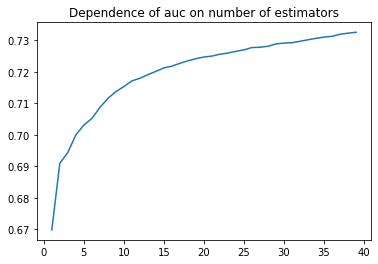

In [8]:
cv_t = []
c_t = []
for i in tqdm(range(1, 40, 1)):
    c_t.append(i)
    model_tree_1 = CatBoostClassifier(n_estimators = i, cat_features=cat_features_idx)
    cv_auc = cross_val_score(model_tree_1, X, y, cv=5, scoring='roc_auc')
    cv_t.append(cv_auc.mean())

plt.plot(c_t, cv_t)
plt.title("Dependence of auc on number of estimators")

Далее была построенна модель зависимости auc от переменной n_estimators для приблизительного определния оптимального числа деревьев. В частности, было определено, что с увеличением n_estimators качество модели увеличется. Таким образом, было выдвинуто предположение о количестве деревьев, равному 115 > дефолтного числа.

In [11]:
model = CatBoostClassifier(cat_features=cat_features_idx, n_estimators = 115)

In [12]:
cv_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()

Learning rate set to 0.486288
0:	learn: 0.5376467	total: 15.3ms	remaining: 1.75s
1:	learn: 0.4841490	total: 30.7ms	remaining: 1.73s
2:	learn: 0.4624693	total: 45ms	remaining: 1.68s
3:	learn: 0.4545877	total: 61.1ms	remaining: 1.7s
4:	learn: 0.4493186	total: 75.1ms	remaining: 1.65s
5:	learn: 0.4461754	total: 88.4ms	remaining: 1.6s
6:	learn: 0.4435706	total: 102ms	remaining: 1.57s
7:	learn: 0.4418480	total: 116ms	remaining: 1.55s
8:	learn: 0.4409943	total: 130ms	remaining: 1.52s
9:	learn: 0.4396704	total: 142ms	remaining: 1.49s
10:	learn: 0.4384914	total: 154ms	remaining: 1.46s
11:	learn: 0.4375428	total: 167ms	remaining: 1.43s
12:	learn: 0.4363777	total: 181ms	remaining: 1.42s
13:	learn: 0.4353683	total: 193ms	remaining: 1.39s
14:	learn: 0.4342595	total: 220ms	remaining: 1.47s
15:	learn: 0.4335299	total: 239ms	remaining: 1.48s
16:	learn: 0.4330411	total: 254ms	remaining: 1.46s
17:	learn: 0.4322291	total: 267ms	remaining: 1.44s
18:	learn: 0.4316946	total: 280ms	remaining: 1.41s
19:	learn

49:	learn: 0.4181981	total: 671ms	remaining: 872ms
50:	learn: 0.4178751	total: 692ms	remaining: 869ms
51:	learn: 0.4175424	total: 708ms	remaining: 858ms
52:	learn: 0.4174903	total: 722ms	remaining: 845ms
53:	learn: 0.4170334	total: 735ms	remaining: 830ms
54:	learn: 0.4166775	total: 747ms	remaining: 815ms
55:	learn: 0.4163288	total: 762ms	remaining: 802ms
56:	learn: 0.4161795	total: 776ms	remaining: 789ms
57:	learn: 0.4159541	total: 789ms	remaining: 776ms
58:	learn: 0.4158110	total: 802ms	remaining: 761ms
59:	learn: 0.4155519	total: 815ms	remaining: 747ms
60:	learn: 0.4150742	total: 827ms	remaining: 732ms
61:	learn: 0.4149375	total: 839ms	remaining: 717ms
62:	learn: 0.4146720	total: 850ms	remaining: 702ms
63:	learn: 0.4144232	total: 864ms	remaining: 688ms
64:	learn: 0.4141853	total: 884ms	remaining: 680ms
65:	learn: 0.4137656	total: 903ms	remaining: 670ms
66:	learn: 0.4135310	total: 917ms	remaining: 657ms
67:	learn: 0.4132771	total: 929ms	remaining: 642ms
68:	learn: 0.4130703	total: 941

108:	learn: 0.4064506	total: 1.47s	remaining: 81.2ms
109:	learn: 0.4063431	total: 1.5s	remaining: 68ms
110:	learn: 0.4061148	total: 1.51s	remaining: 54.5ms
111:	learn: 0.4060003	total: 1.52s	remaining: 40.8ms
112:	learn: 0.4058959	total: 1.54s	remaining: 27.2ms
113:	learn: 0.4058210	total: 1.55s	remaining: 13.6ms
114:	learn: 0.4056751	total: 1.56s	remaining: 0us
Learning rate set to 0.486288
0:	learn: 0.5370118	total: 20ms	remaining: 2.28s
1:	learn: 0.4831998	total: 36.1ms	remaining: 2.04s
2:	learn: 0.4627827	total: 48.5ms	remaining: 1.81s
3:	learn: 0.4524327	total: 63.2ms	remaining: 1.75s
4:	learn: 0.4467245	total: 75.5ms	remaining: 1.66s
5:	learn: 0.4440474	total: 87.6ms	remaining: 1.59s
6:	learn: 0.4413548	total: 103ms	remaining: 1.58s
7:	learn: 0.4392884	total: 116ms	remaining: 1.55s
8:	learn: 0.4375574	total: 128ms	remaining: 1.5s
9:	learn: 0.4361967	total: 141ms	remaining: 1.48s
10:	learn: 0.4351453	total: 153ms	remaining: 1.45s
11:	learn: 0.4344093	total: 165ms	remaining: 1.42s


46:	learn: 0.4191832	total: 631ms	remaining: 913ms
47:	learn: 0.4187979	total: 652ms	remaining: 911ms
48:	learn: 0.4185275	total: 668ms	remaining: 900ms
49:	learn: 0.4181219	total: 682ms	remaining: 886ms
50:	learn: 0.4178564	total: 694ms	remaining: 871ms
51:	learn: 0.4177678	total: 706ms	remaining: 856ms
52:	learn: 0.4175126	total: 718ms	remaining: 840ms
53:	learn: 0.4172335	total: 731ms	remaining: 826ms
54:	learn: 0.4169702	total: 745ms	remaining: 813ms
55:	learn: 0.4166840	total: 758ms	remaining: 798ms
56:	learn: 0.4165461	total: 769ms	remaining: 782ms
57:	learn: 0.4164030	total: 784ms	remaining: 771ms
58:	learn: 0.4162122	total: 797ms	remaining: 756ms
59:	learn: 0.4159805	total: 809ms	remaining: 741ms
60:	learn: 0.4159204	total: 820ms	remaining: 726ms
61:	learn: 0.4156811	total: 835ms	remaining: 713ms
62:	learn: 0.4153884	total: 855ms	remaining: 705ms
63:	learn: 0.4150882	total: 879ms	remaining: 700ms
64:	learn: 0.4147002	total: 893ms	remaining: 687ms
65:	learn: 0.4145147	total: 907

In [14]:
print('auc:', cv_auc)

auc: 0.7400227973386656
